# Plotting Sigmoid in 2D

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [0]:
def sigmoid(w, b, x):
  return 1 / (1 + np.exp(-(w*x + b)))

In [0]:
sigmoid(0,0,5)

0.5

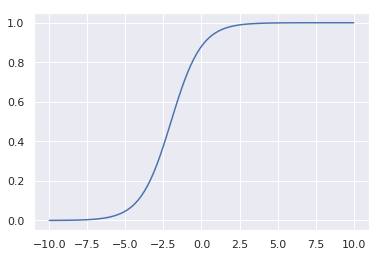

In [0]:
w = 1 #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = 2 #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10, 10, 100)
Y = sigmoid(w, b, X)

plt.plot(X,Y)
plt.show()

## Invert sigmoid around y axis by negative value of w and move the graph by playing with b value

In [0]:
type(x)

numpy.ndarray

In [0]:
type(Y)

numpy.ndarray

# Plotting Sigmoid in 3D

In [0]:
def sigmoid_2D(x1, x2, w1, w2, b):
  return 1 / (1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [0]:
sigmoid_2D(1, -1, 1, -1, 0.9)

0.9478464369215823

In [0]:
from mpl_toolkits import mplot3d
import matplotlib.colors

In [0]:
w1 = 2
w2 = -0.5
b = 0

X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)
XX1, XX2 = np.meshgrid(X1, X2)



In [0]:
Y = sigmoid_2D(XX1, XX2, w1, w2, b)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"]) # red = 0, green 1

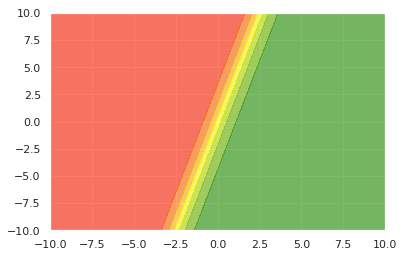

In [0]:
plt.contourf(XX1, XX2, Y, cmap=my_cmap, alpha=0.6)
plt.show()

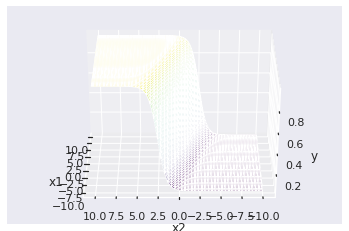

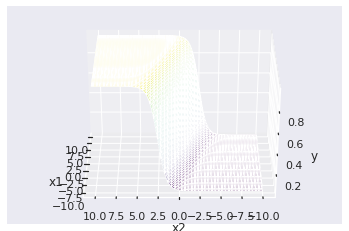

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.contour3D(XX1, XX2, Y, 200, cmap='viridis')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 180)

# Plotting Loss for a given dataset

In [0]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10 # random.random generates output from -1 to 1 range


Y = sigmoid (w_unknown, b_unknown, X)

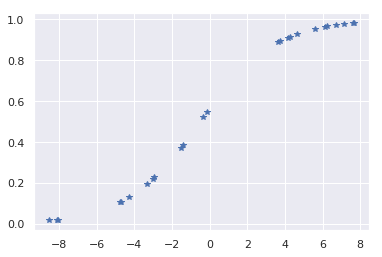

In [0]:
plt.plot(X, Y, '*')
plt.show()

In [0]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(w_est, b_est, x))**2
  return loss
  

In [0]:
W = np.linspace(0, 2, 100)
B = np.linspace(-1, 1, 100)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

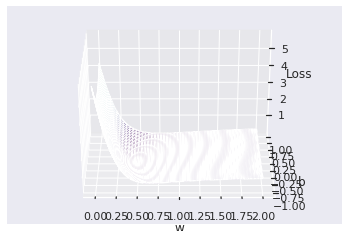

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.contour3D(XX1, XX2, Y, 200, cmap='viridis')
ax.plot_surface(WW, BB, Loss, cmap='viridis')

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)
# fig

In [0]:
ij = np.argmin(Loss)
i = np.floor(ij/Loss.shape[1])
j = ij - i*Loss.shape[1]
print(i, j, Loss[int(i), int(j)])

62.0 25.0 5.685853627217635e-05


In [0]:
print(WW[int(i), int(j)], BB[int(i), int(j)])

0.5050505050505051 0.2525252525252526


# Sigmoid Neuron Class

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1/(1 + np.exp(-(self.w*x + self.b)))
  
  def predict(self, X):
    Y = []
    for x in X:
      Y.append(self.model(x))
    return np.asarray(Y)
  
  def loss(self, Y, Y_predicted):
#     y_predicted = self.predict(X)
    loss = 0
    for y,y_hat in zip(Y, Y_predicted):
      loss += (y - y_hat)**2
    return loss
  
  def fit(self, X, Y, epoch=1, eta=1):
    self.w = np.ones((X.shape[1]))
    self.b = 0.0
    
    for i in range(epoch):
      y_pred = self.predict(X)
      loss = self.loss(Y, y_pred)
      
      
    